# Sistema de recomendação
- Filtro colaborativo baseado no usuário
- Filtro colaborativo baseado no item

In [58]:
import pandas as pd
import numpy as np
import math
import pylab as plt

In [59]:
#Será criada uma lista de pessoas que assistiram filmes e as notas que eles deram para cada filme
movie_user_preferences={'Jill': {'Avenger: Age of Ultron': 7.0,
'Django Unchained': 6.5,
'Gone Girl': 9.0,
'Kill the Messenger': 8.0},
'Julia': {'Avenger: Age of Ultron': 10.0,
'Django Unchained': 6.0,
'Gone Girl': 6.5,
'Kill the Messenger': 6.0,
'Zoolander': 6.5},
'Max': {'Avenger: Age of Ultron': 7.0,
'Django Unchained': 7.0,
'Gone Girl': 10.0,
'Horrible Bosses 2': 6.0,
'Kill the Messenger': 5.0,
'Zoolander': 10.0},
'Robert': {'Avenger: Age of Ultron': 8.0,
'Django Unchained': 7.0,
'Horrible Bosses 2': 5.0,
'Kill the Messenger': 9.0,
'Zoolander': 9.0},
'Sam': {'Avenger: Age of Ultron': 10.0,
'Django Unchained': 7.5,
'Gone Girl': 6.0,
'Horrible Bosses 2': 3.0,
'Kill the Messenger': 5.5,
'Zoolander': 7.0},
'Toby': {'Avenger: Age of Ultron': 8.5,
'Django Unchained': 9.0,
'Zoolander': 2.0},
'William': {'Avenger: Age of Ultron': 6.0,
'Django Unchained': 8.0,
'Gone Girl': 7.0,
'Horrible Bosses 2': 4.0,
'Kill the Messenger': 6.5,
'Zoolander': 4.0}}

In [60]:
#Verifica a nota que o Willian deu para o filme/serie Gone Girl
movie_user_preferences['William']['Gone Girl']

7.0

#### Filtro colocaborativo baseado no usuário
- A similiridade entre os usuários pode ser calculada utilizando a Correlação de Pearson, a distância Euclidiana, a distância de Manhattan, dentre outras

##### Utilizando a distância Euclidiana

In [61]:
data = []
for i in movie_user_preferences.keys():
    try:
        data.append( (i
                    ,movie_user_preferences[i]['Django Unchained']
                    ,movie_user_preferences[i]['Avenger: Age of Ultron']) )
    except:
        pass

In [62]:
df = pd.DataFrame(data = data, columns = [ 'user', 'django', 'avenger'])
df

,user,django,avenger
0,Jill,6.5,7.0
1,Julia,6.0,10.0
2,Max,7.0,7.0
3,Robert,7.0,8.0
4,Sam,7.5,10.0
5,Toby,9.0,8.5
6,William,8.0,6.0


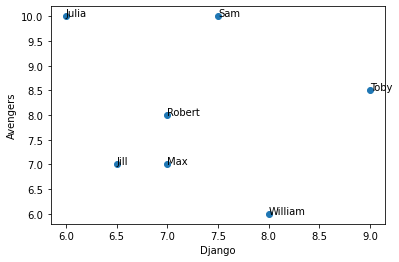

In [63]:
plt.scatter(df.django, df.avenger)
plt.xlabel('Django')
plt.ylabel('Avengers')
for i, txt in enumerate(df.user):
    plt.annotate(txt, (df.django[i], df.avenger[i]))
plt.show()

##### Distância Euclidiana

In [64]:
#Distância entre Jill and Toby
math.sqrt(math.pow(8.5-7, 2) + math.pow(9-6.5, 2))

2.9154759474226504

In [65]:
#Distância entre Robert and Max
math.sqrt(math.pow(8-7, 2) + math.pow(7-7, 2))

1.0

In [66]:
#Calculando a similiridade da distância euclidiana entre Jill and Toby
1 / (1 + math.sqrt(math.pow(8.5-7, 2) + math.pow(9-6.5, 2)))

0.2553967929896867

In [67]:
#Calculando a similiridade da distância euclidiana entre Robert and Max
1 / (1 + math.sqrt(math.pow(8-7, 2) + math.pow(7-7, 2)))

0.5

In [74]:
#Função para o calculo de similaridade da distância euclidiana
def sim_distance(prefs, person1, person2):
    si = {}
    for item in prefs[person1]:
        if item in prefs[person2]:
            si[item] = 1
    if len(si) == 0:
        return 0 
    sum_of_squares = sum([pow(prefs[person1][item] - prefs[person2][item], 2)
                          for item in prefs[person1] if item in prefs[person2]])
    return 1 / (1+sum_of_squares)

In [75]:
sim_distance(movie_user_preferences, 'Sam', 'Toby')

0.03278688524590164

#### Similaridade entre os usuários com a distância euclidiana

In [76]:
def top_matches(prefs, person, n = 5, similarity = sim_distance):
    scores=[(similarity(prefs, person, other), other)
    for other in prefs if other != person]
    
    scores.sort()
    scores.reverse()
    return scores[0:n]

In [77]:
top_matches(movie_user_preferences, 'Toby', n = 3, similarity = sim_distance)

[(0.10526315789473684, 'Jill'),
 (0.08163265306122448, 'William'),
 (0.03278688524590164, 'Sam')]

In [79]:
#### Correlação de Pearson comm distância
#Cria um dataframe dos usuarios e suas notas
def create_movies_user_df(input_data, user1, user2):
    data = []
    for movie in input_data[user1].keys():
        if movie in input_data[user2].keys():
            try:
                data.append( (movie
                             ,input_data[user1][movie]
                             ,input_data[user2][movie]))
            except:
                pass
    
    return pd.DataFrame(data = data, columns = ['movie', user1, user2])

In [97]:
#Cria o data frame com avaliações de Sam e William
df = create_movies_user_df(movie_user_preferences, 'Sam', 'William')
df

,movie,Sam,William
0,Avenger: Age of Ultron,10.0,6.0
1,Django Unchained,7.5,8.0
2,Gone Girl,6.0,7.0
3,Horrible Bosses 2,3.0,4.0
4,Kill the Messenger,5.5,6.5
5,Zoolander,7.0,4.0


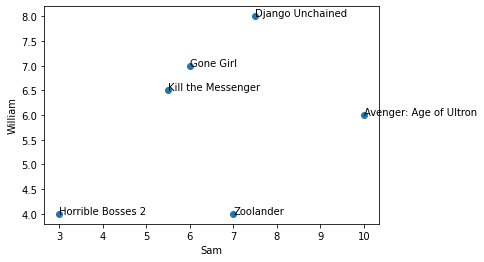

In [117]:
#plot a relação das notas
plt.scatter(df.Sam, df.William)
plt.xlabel('Sam')
plt.ylabel('William')
for i, txt in enumerate(df.movie):
    plt.annotate(txt, (df.Sam[i] , df.William[i]))
plt.show()

In [118]:
#calculo da correlação
from scipy.stats import pearsonr
pearsonr(df.Sam, df.William)

(0.37067401970178426, 0.46945413268410935)

In [120]:
#Cria o data frame com avaliações de Sam e Julia
df2 = create_movies_user_df(movie_user_preferences, 'Sam', 'Julia')
df2

,movie,Sam,Julia
0,Avenger: Age of Ultron,10.0,10.0
1,Django Unchained,7.5,6.0
2,Gone Girl,6.0,6.5
3,Kill the Messenger,5.5,6.0
4,Zoolander,7.0,6.5


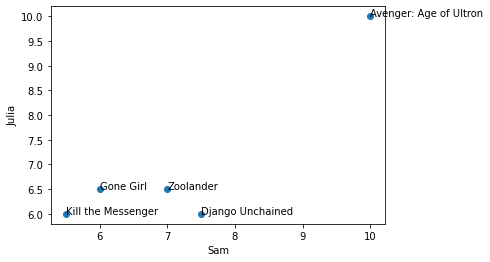

In [121]:
#plot a relação das notas
plt.scatter(df2.Sam, df2.Julia)
plt.xlabel('Sam')
plt.ylabel('Julia')
for i, txt in enumerate(df2.movie):
    plt.annotate(txt, (df2.Sam[i] , df2.Julia[i]))
plt.show()

In [122]:
#correlação
pearsonr(df2.Sam, df2.Julia)

(0.8828518332602512, 0.047277507003439405)

In [157]:
#Cria formula para retorna a correlação entre dois usuários
def sim_pearson(prefs, p1, p2):
    si = {}
    for item in prefs[p1]:
        if item in prefs[p2]:
            si[item] = 1
        
    n = len(si)
    
    if n == 0:
        return 0
    
    sum1 = sum([prefs[p1][it] for it in si])
    sum2 = sum([prefs[p2][it] for it in si])
    
    sum1sq = sum([pow(prefs[p1][it], 2) for it in si])
    sum2sq = sum([pow(prefs[p2][it], 2) for it in si])
    
    psum = sum([prefs[p1][it]* prefs[p2][it] for it in si])
    
    num = psum-(sum1*sum2/n)
    den = math.sqrt((sum1sq - pow(sum1,2)/n) * (sum2sq - pow(sum2,2)/n))
    if den == 0:
        return 0
    r = num/den
    return r

In [158]:
sim_pearson(movie_user_preferences, 'Sam', 'Julia')

0.8828518332602507

In [161]:
top_matches(movie_user_preferences, 'Toby', n = 3, similarity = sim_pearson)

[(0.8962581595302719, 'William'),
 (0.5775410594096947, 'Sam'),
 (0.33779725988147685, 'Julia')]

### Como agora podemos saber quem é similar a 'você', podemos ver qual o score dos filmes que podem ser recomendados a 'você'

In [184]:
def get_recommendations(prefs, person, similarity = sim_pearson):
    totals = {}
    simsums = {}
    
    for other in prefs:
        if other == person: 
            continue
        sim = similarity(prefs, person, other)
        
        if sim <= 0:
            continue
        for item in prefs[other]:
            if item not in prefs[person] or prefs[person][item] == 0:
                totals.setdefault(item, 0)
                totals[item] += prefs[other][item]*sim
                simsums.setdefault(item,0)
                simsums[item] += sim
                
    rankings = [(total/simsums[item], item) for item,total in totals.items()]
    
    rankings.sort( )
    rankings.reverse( )
    return rankings

In [185]:
get_recommendations(movie_user_preferences,'Toby')

[(6.587965809121004, 'Gone Girl'),
 (6.087965809121004, 'Kill the Messenger'),
 (3.608127720528246, 'Horrible Bosses 2')]

In [186]:
get_recommendations(movie_user_preferences,'Toby', similarity = sim_distance)

[(7.773043918833565, 'Gone Girl'),
 (6.976295282563891, 'Kill the Messenger'),
 (4.093380589669568, 'Horrible Bosses 2')]